In [146]:
from waterworld.waterworld import env as custom_waterworld
from potential_field.potential_field_policy import PotentialFieldPolicy
from test_policy import get_configs
from utils import get_frames

from pettingzoo.utils import average_total_reward

from multiprocessing import Pool, cpu_count

import tqdm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json
import glob
import os

from PIL import Image, ImageSequence
from imageio import imread

# Test results

In [2]:
test_main = []
for file in glob.glob("test_results/potential_field/test_main/*.json"):
    with open(file) as f:
        test_main.append(json.load(f))
test_main = pd.DataFrame([
    {
        "n_coop": config["env_config"]["n_coop"], 
        "n_sensors":config["env_config"]["n_sensors"],
        "angle": (
            ("rand" if config["potential_field_config"]["randomize_angle"] else "na") 
            if "randomize_angle" in config["potential_field_config"] 
            else config["potential_field_config"]["spin_angle"]),
        "rewards": config["rewards"]
    }
    for config in test_main])
test_main["rewards_mean"] = test_main.rewards.apply(lambda x: np.mean(x))
test_main["rewards_min"] = test_main.rewards.apply(lambda x: np.min(x))
test_main["rewards_max"] = test_main.rewards.apply(lambda x: np.max(x))
test_main["rewards_std"] = test_main.rewards.apply(lambda x: np.std(x))
test_main = test_main.explode('rewards')
test_main["rewards"] = test_main["rewards"].astype(float)

## by sensor

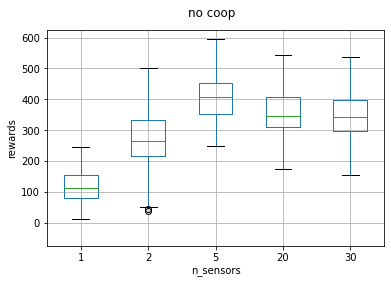

In [72]:
ax = test_main[(test_main["angle"] == "na") & (test_main["n_coop"] == 1)].boxplot("rewards", by="n_sensors")
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-75, 625))
fig = ax.get_figure()
plt.gcf().subplots_adjust(left=0.12)
fig.suptitle("no coop")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_sensor/no_coop.png")

In [116]:
test_main[(test_main["angle"] == "na") & (test_main["n_coop"] == 2)].groupby("n_sensors").mean()

,n_coop,rewards,rewards_mean,rewards_min,rewards_max,rewards_std
n_sensors,,,,,,
1,2,14.984861,14.984861,-18.947698,122.285861,31.630822
2,2,1.703610,1.703610,-35.525667,118.212838,33.208086
5,2,-21.884562,-21.884562,-57.382381,61.689736,24.635373
20,2,2.260042,2.260042,-41.961629,89.451961,28.028528
30,2,0.732727,0.732727,-41.648819,96.477402,31.198057


In [115]:
test_main[(test_main["angle"] == "na") & (test_main["n_coop"] == 1)].groupby("n_sensors").count()

,n_coop,angle,rewards,rewards_mean,rewards_min,rewards_max,rewards_std
n_sensors,,,,,,,
1,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100
20,100,100,100,100,100,100,100
30,100,100,100,100,100,100,100


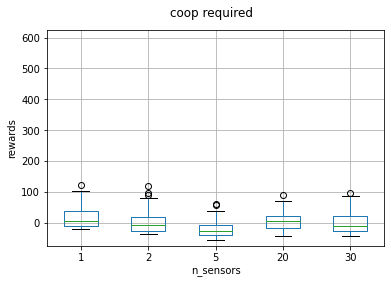

In [105]:
ax = test_main[(test_main["angle"] == "na") & (test_main["n_coop"] == 2)].boxplot("rewards", by="n_sensors")
ax.set_title("")
ax.set_ylabel("rewards")
plt.gcf().subplots_adjust(left=0.12)
# ax.set_ylabel("")
# ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-75, 625))
fig = ax.get_figure()
fig.suptitle("coop required")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_sensor/coop_ticks.png")

## by angle

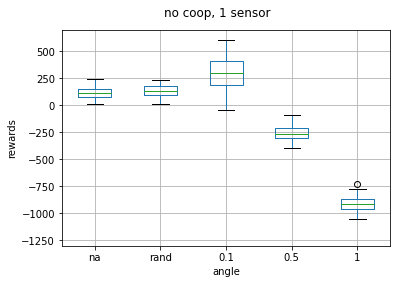

In [80]:
ax = test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 1) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("no coop, 1 sensor")
plt.gcf().subplots_adjust(left=0.14)
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/1_sensor/no_coop.png")

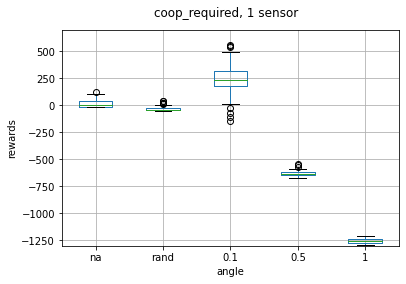

In [106]:
ax = test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
plt.gcf().subplots_adjust(left=0.12)
# ax.set_ylabel("")
# ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("coop_required, 1 sensor")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/1_sensor/coop_ticks.png")

In [117]:
test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].groupby("angle").mean()

,n_coop,n_sensors,rewards,rewards_mean,rewards_min,rewards_max,rewards_std
angle,,,,,,,
0.1,2,1,248.835911,248.835911,-142.374931,784.505841,143.685941
0.5,2,1,-630.959426,-630.959426,-673.780408,-541.451336,22.931368
1,2,1,-1257.250683,-1257.250683,-1292.095365,-1205.175684,21.032406
na,2,1,14.984861,14.984861,-18.947698,122.285861,31.630822
rand,2,1,-30.755446,-30.755446,-52.899458,39.543531,19.996405


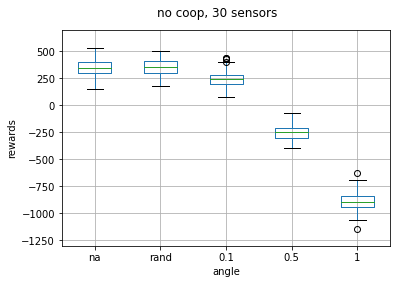

In [82]:
ax = test_main[(test_main["n_sensors"] == 30) & (test_main["n_coop"] == 1) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("no coop, 30 sensors")
plt.gcf().subplots_adjust(left=0.14)
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/30_sensor/no_coop.png")

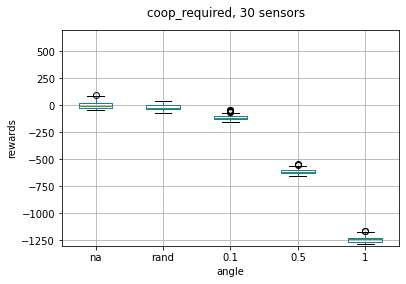

In [107]:
ax = test_main[(test_main["n_sensors"] == 30) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
plt.gcf().subplots_adjust(left=0.12)
# ax.set_ylabel("")
# ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("coop_required, 30 sensors")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/30_sensor/coop_ticks.png")

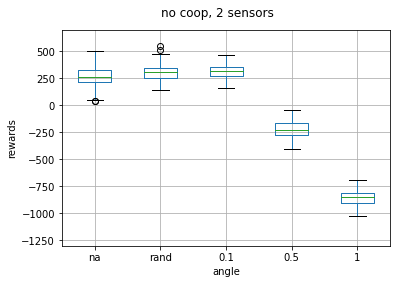

In [84]:
ax = test_main[(test_main["n_sensors"] == 2) & (test_main["n_coop"] == 1) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("no coop, 2 sensors")
plt.gcf().subplots_adjust(left=0.14)
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/2_sensor/no_coop.png")

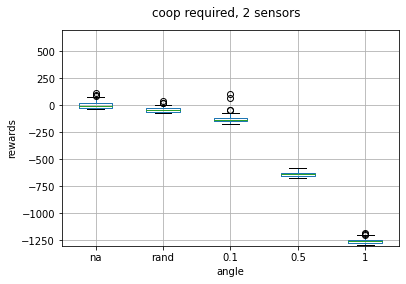

In [108]:
ax = test_main[(test_main["n_sensors"] == 2) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
plt.gcf().subplots_adjust(left=0.12)
# ax.set_ylabel("")
# ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("coop required, 2 sensors")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/2_sensor/coop_ticks.png")

## weights

In [14]:
test_weights = []
for file in glob.glob("test_results/potential_field/weight/*.json"):
    with open(file) as f:
        test_weights.append(json.load(f))
test_weights = pd.DataFrame([
    {
        "n_coop": config["env_config"]["n_coop"], 
        "n_sensors":config["env_config"]["n_sensors"],
        "obs_weight": config["potential_field_config"]["obs_weight"],
        "poison_weight": config["potential_field_config"]["poison_weight"],
        "barrier_weight": config["potential_field_config"]["barrier_weight"],
        "food_weight": config["potential_field_config"]["food_weight"],
        "rewards": config["rewards"]
    }
    for config in test_weights])
test_weights["rewards_mean"] = test_weights.rewards.apply(lambda x: np.mean(x))
test_weights["rewards_min"] = test_weights.rewards.apply(lambda x: np.min(x))
test_weights["rewards_max"] = test_weights.rewards.apply(lambda x: np.max(x))
test_weights["rewards_std"] = test_weights.rewards.apply(lambda x: np.std(x))
test_weights = test_weights.explode('rewards')
test_weights["rewards"] = test_weights["rewards"].astype(float)

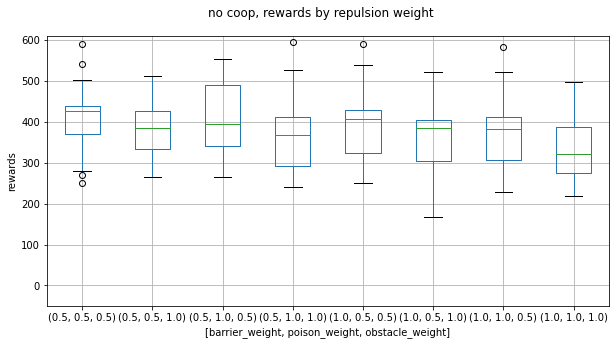

In [76]:
ax = test_weights[(test_weights["n_coop"] == 1) & (test_weights["food_weight"] == 1)].boxplot("rewards", figsize=(10, 5), by=["barrier_weight","poison_weight","obs_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
ax.set_xlabel("[barrier_weight, poison_weight, obstacle_weight]")
fig = ax.get_figure()
fig.suptitle("no coop, rewards by repulsion weight")
plt.gcf().subplots_adjust(left=0.12)
plt.show()
fig.savefig("test_results/graphs/potential_field/by_repulsion_weight/no_coop.png")

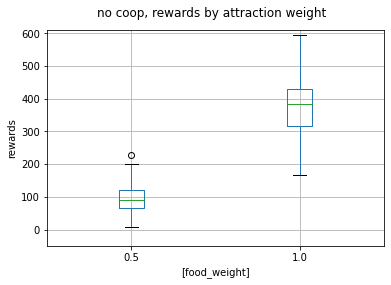

In [77]:
ax = test_weights[(test_weights["n_coop"] == 1)].boxplot("rewards", by=["food_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
fig = ax.get_figure()
fig.suptitle("no coop, rewards by attraction weight")
plt.gcf().subplots_adjust(left=0.12)
plt.show()
fig.savefig("test_results/graphs/potential_field/by_attraction_weight/no_coop.png")

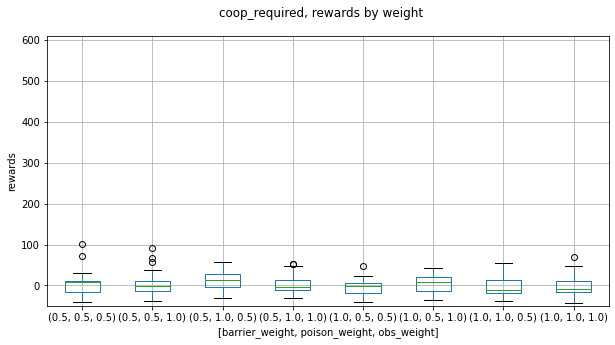

In [78]:
ax = test_weights[(test_weights["n_coop"] == 2) & (test_weights["food_weight"] == 1)].boxplot("rewards", figsize=(10, 5), by=["barrier_weight","poison_weight","obs_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
fig = ax.get_figure()
fig.suptitle("coop_required, rewards by weight")
plt.gcf().subplots_adjust(left=0.12)
plt.show()
fig.savefig("test_results/graphs/potential_field/by_repulsion_weight/coop.png")

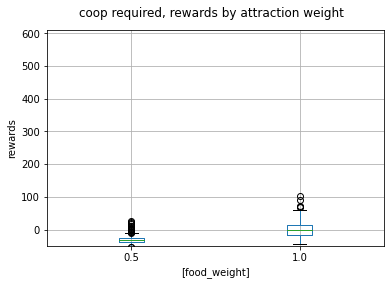

In [109]:
ax = test_weights[(test_weights["n_coop"] == 2)].boxplot("rewards", by=["food_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
plt.gcf().subplots_adjust(left=0.12)
# ax.set_ylabel("")
# ax.yaxis.set_ticklabels([]) 
fig = ax.get_figure()
fig.suptitle("coop required, rewards by attraction weight")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_attraction_weight/coop_ticks.png")

## random results

In [19]:
test_random = []
for file in glob.glob("test_results/potential_field/test_random/*.json"):
    with open(file) as f:
        test_random.append(json.load(f))
test_random = pd.DataFrame([
    {
        "n_coop": config["env_config"]["n_coop"],
        "rewards": config["rewards"]
    }
    for config in test_random])
test_random = test_random.explode('rewards')
test_random["rewards"] = test_random["rewards"].astype(float)

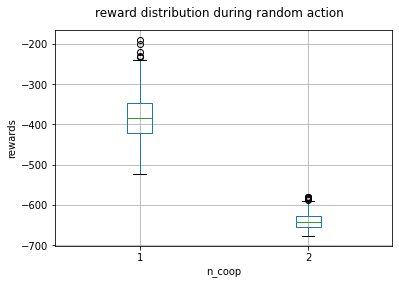

In [71]:
ax = test_random.boxplot("rewards", by="n_coop")
ax.set_title("")
ax.set_ylabel("rewards")
fig = ax.get_figure()
fig.suptitle("reward distribution during random action")
plt.gcf().subplots_adjust(left=0.12)
plt.show()
fig.savefig("test_results/graphs/random_action.png")

In [87]:
test_random.groupby("n_coop").mean()

,rewards
n_coop,
1,-382.758478
2,-640.985771


## rl

In [21]:
rl_results = []
rl_results_names = glob.glob("test_results/ddpg/*/*/results.txt")
for result_txt in rl_results_names:
    rl_results.append(pd.read_csv(result_txt, header=None).values.flatten())

In [22]:
rl_results_names

['test_results/ddpg/APEX_DDPG_custom_waterworld1_nocoop_657ce_00000_0_2022-03-31_09-34-14/checkpoint_000420/results.txt',
 'test_results/ddpg/APEX_DDPG_custom_waterworld_1_80d21_00000_0_2022-03-28_11-18-45/checkpoint_000870/results.txt',
 'test_results/ddpg/APEX_DDPG_custom_waterworld_1_80d21_00000_0_2022-03-28_11-18-45/checkpoint_001580/results.txt']

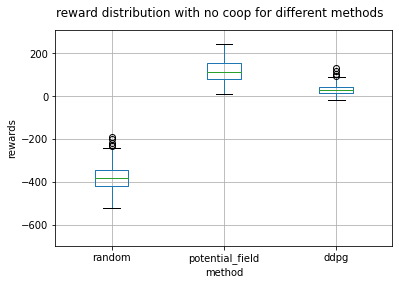

In [79]:
compare_df = pd.concat([
    pd.DataFrame({"rewards": test_random[test_random["n_coop"] == 1].rewards.values, "strategy":"random"}),
    pd.DataFrame({
        "rewards": test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 1) & (test_main["angle"] == "na")].rewards.values, 
        "strategy": "potential_field"}),
    pd.DataFrame({"rewards": rl_results[0], "strategy": "ddpg"}), 
])
compare_df["rewards"] = compare_df["rewards"].astype(float)
ax = compare_df.boxplot(by="strategy", positions=[2, 1, 0])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-700, 310))
ax.set_xlabel("method")
fig = ax.get_figure()
fig.suptitle("reward distribution with no coop for different methods")
plt.gcf().subplots_adjust(left=0.12)
plt.show()
fig.savefig("test_results/graphs/ddpg/no_coop.png")

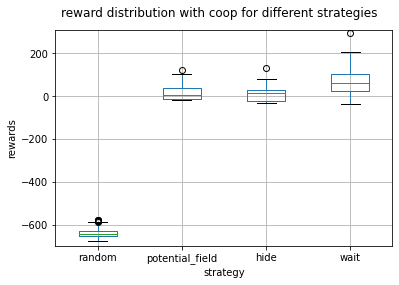

In [118]:
compare_df = pd.concat([
    pd.DataFrame({"rewards": test_random[test_random["n_coop"] == 2].rewards.values, "strategy":"random"}),
    pd.DataFrame({
        "rewards": test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 2) & (test_main["angle"] == "na")].rewards.values, 
        "strategy": "potential_field"}),
    pd.DataFrame({"rewards": rl_results[1], "strategy": "wait"}), 
    pd.DataFrame({"rewards": rl_results[2], "strategy": "hide"})
])
compare_df["rewards"] = compare_df["rewards"].astype(float)
ax = compare_df.boxplot(by="strategy", positions=[2, 1, 0, 3])
ax.set_title("")
ax.set_ylabel("rewards")
plt.gcf().subplots_adjust(left=0.12)
# ax.set_ylabel("")
# ax.yaxis.set_ticklabels([])
ax.set_ylim((-700, 310))
ax.set_xlabel("strategy")
fig = ax.get_figure()
fig.suptitle("reward distribution with coop for different strategies")
plt.show()
fig.savefig("test_results/graphs/ddpg/coop_ticks.png")

In [120]:
compare_df.groupby("strategy").mean()

,rewards
strategy,
hide,10.150234
potential_field,14.984861
random,-640.985771
wait,68.424297


# see trajectory

In [158]:
im = Image.open("test_results/potential_field/1_sensor_0.1angle_rot.gif")

In [211]:
index = 1
trajectory = np.zeros((750, 750))
for frame in ImageSequence.Iterator(im):
    trajectory[np.array(frame.convert("L")) == 113] = 1
    index += 1
    if index > 100:
        break

(-0.5, 749.5, 749.5, -0.5)

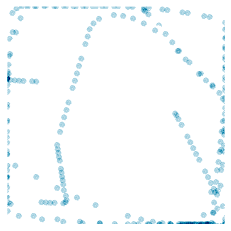

In [213]:
plt.imshow((trajectory), cmap="ocean_r")
plt.axis('off')